In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sqlite3
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


# GET DF FROM DB
# Connect to .db file (or create it if it doesn't exist)

conn = sqlite3.connect("C:\\Schoool work\\ProjectFour-GroupOne\\heart.db")

query = "SELECT * FROM heart_attack_risk"
# Load the query result into a DataFrame
df = pd.read_sql_query(query, conn)
conn.close()


# Display the first few rows of the DataFrame
print(df.head())

   Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0   67    Male          208          72         0               0        1   
1   21    Male          389          98         1               1        1   
2   21  Female          324          72         1               0        0   
3   84    Male          383          73         1               1        1   
4   66    Male          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ... Medication Use  \
0        0                    0                        4  ...              0   
1        1                    1                        1  ...              0   
2        0                    0                        2  ...              1   
3        0                    1                        9  ...              0   
4        1                    0                        5  ...              0   

   Stress Level  Sedentary Hours Per Day  BMI  Tri

In [5]:
print(df.columns)

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic Pressure', 'Diastolic Pressure'],
      dtype='object')


In [8]:
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure
0,67,Male,208,72,0,0,1,0,0,4,...,0,9,6,31,286,0,6,0,158,88
1,21,Male,389,98,1,1,1,1,1,1,...,0,1,4,27,235,1,7,0,165,93
2,21,Female,324,72,1,0,0,0,0,2,...,1,9,9,28,587,4,4,0,174,99
3,84,Male,383,73,1,1,1,0,1,9,...,0,9,7,36,378,3,4,0,163,100
4,66,Male,318,93,1,1,1,1,0,5,...,0,6,1,21,231,1,5,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7,...,1,8,10,19,67,7,7,0,94,76
8759,28,Female,120,73,1,0,0,1,0,16,...,0,8,3,23,617,4,9,0,157,102
8760,47,Male,250,105,0,1,1,1,1,3,...,0,5,2,35,527,4,4,1,161,75
8761,36,Male,178,60,1,0,1,0,0,3,...,1,5,0,27,114,2,8,0,119,67


In [9]:
# Heart Attack Risk Prediction Model

# 1. Data Cleaning:
# Load Raw Data: Import the CSV file into a pandas DataFrame.
# Remove Unnecessary Columns
# Handle Missing Values
# Data Preprocessing



# Remove unnecessary columns (example: ID column)
df.drop(columns=["ID"], inplace=True, errors='ignore')


In [10]:
# Handle missing values
df1 = df.dropna()
df = pd.get_dummies(df1, drop_first=True)


In [11]:
# Split the data into features and target variable
X = df.drop('Heart Attack Risk', axis=1) 
y = df['Heart Attack Risk']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest model ( good for classification tasks)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot()
#plt.show()

Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      2808
           1       0.41      0.02      0.04      1574

    accuracy                           0.64      4382
   macro avg       0.53      0.50      0.41      4382
weighted avg       0.56      0.64      0.51      4382



Training model with n_estimators=100
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      2808
           1       0.41      0.02      0.04      1574

    accuracy                           0.64      4382
   macro avg       0.53      0.50      0.41      4382
weighted avg       0.56      0.64      0.51      4382



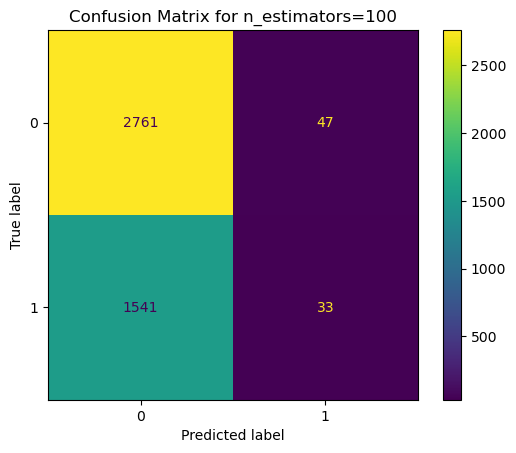

Training model with n_estimators=500
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      2808
           1       0.44      0.01      0.02      1574

    accuracy                           0.64      4382
   macro avg       0.54      0.50      0.40      4382
weighted avg       0.57      0.64      0.51      4382



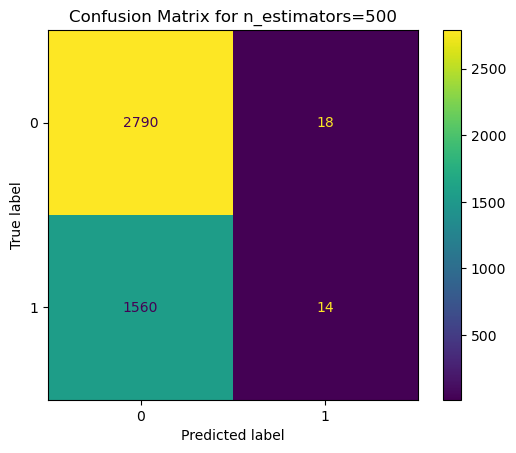

Training model with n_estimators=50
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.64      0.96      0.77      2808
           1       0.36      0.04      0.07      1574

    accuracy                           0.63      4382
   macro avg       0.50      0.50      0.42      4382
weighted avg       0.54      0.63      0.52      4382



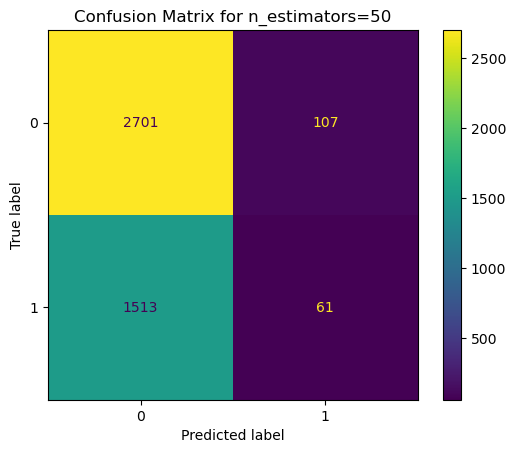

In [12]:
# List of n_estimators values to experiment with
n_estimators_values = [100, 500, 50]

for n_estimators in n_estimators_values:
    print(f"Training model with n_estimators={n_estimators}")
    
    # Initialize the Random Forest model with the current n_estimators and different max_features
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features='sqrt',
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Print classification report
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix for n_estimators={n_estimators}")
    plt.show()

Training model with max_features=sqrt
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      2808
           1       0.41      0.02      0.04      1574

    accuracy                           0.64      4382
   macro avg       0.53      0.50      0.41      4382
weighted avg       0.56      0.64      0.51      4382



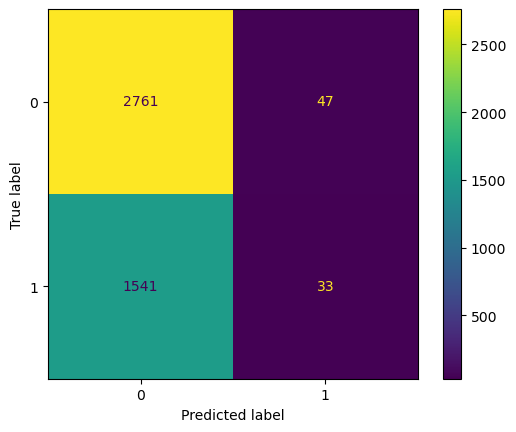

Training model with max_features=log2
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      2808
           1       0.41      0.02      0.04      1574

    accuracy                           0.64      4382
   macro avg       0.53      0.50      0.41      4382
weighted avg       0.56      0.64      0.51      4382



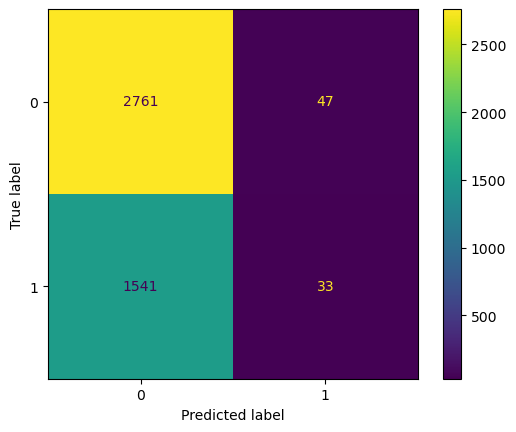

Training model with max_features=0.5
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.64      0.96      0.77      2808
           1       0.40      0.04      0.08      1574

    accuracy                           0.63      4382
   macro avg       0.52      0.50      0.42      4382
weighted avg       0.56      0.63      0.52      4382



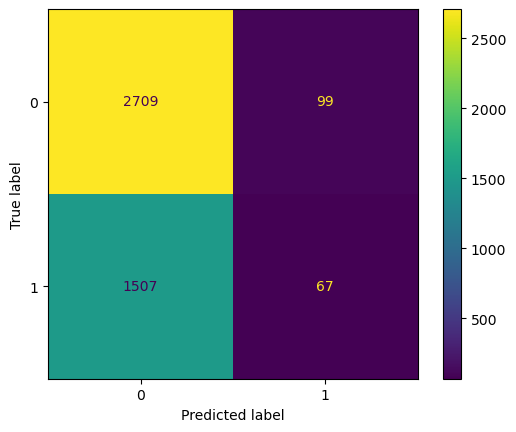

Training model with max_features=1
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      2808
           1       0.40      0.01      0.03      1574

    accuracy                           0.64      4382
   macro avg       0.52      0.50      0.40      4382
weighted avg       0.56      0.64      0.51      4382



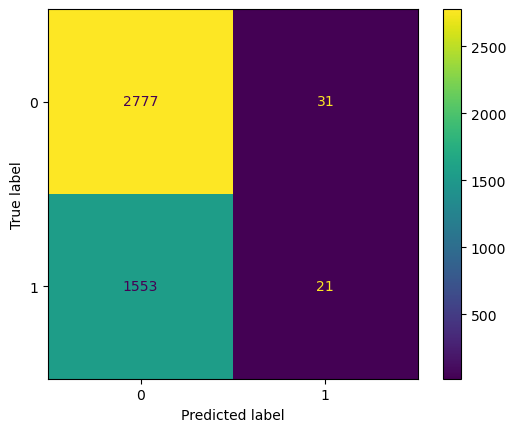

Training model with max_features=None
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.64      0.96      0.77      2808
           1       0.41      0.05      0.09      1574

    accuracy                           0.63      4382
   macro avg       0.52      0.50      0.43      4382
weighted avg       0.56      0.63      0.52      4382



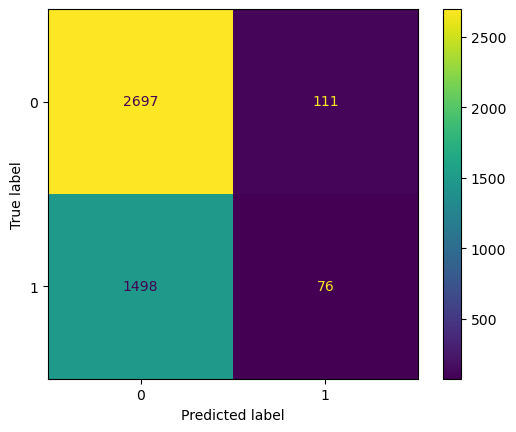

In [13]:
# Experiment with different values for max_features
for max_features in ['sqrt', 'log2', 0.5, 1, None]:
    print(f"Training model with max_features={max_features}")
    
    # Initialize the Random Forest model with more trees and different max_features
    model = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Print classification report
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [ ]:
# List of max_depth values to experiment with
max_depth_values = [500, 100, 10, 50]

for max_depth in max_depth_values:
    print(f"Training model with max_depth={max_depth}")
    
    # Initialize the Random Forest model with more trees, different max_features, and the current max_depth
    model = RandomForestClassifier(
        n_estimators=500,
        max_features='sqrt',
        max_depth=max_depth,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

Training model with max_depth=500
Accuracy: 0.64
Training model with max_depth=100
Accuracy: 0.64
Training model with max_depth=10
